#L04 Submission Pranav

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

# 1 Answer Printing the number of wrongly predicted training examples for each of the 5 epochs

## Preparing the dataset

In [ ]:
##########################
### DATASET
##########################

data = np.genfromtxt('1_perceptron_toydata.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(np.int)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]
# X_train, X_test = X[:70], X[70:]
# y_train, y_test = y[:70], y[70:]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


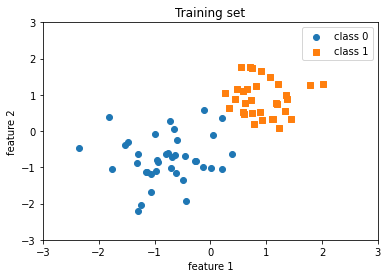

In [ ]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

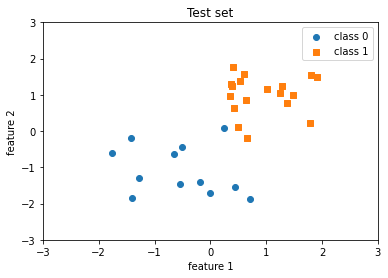

In [ ]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

# Changing the train method in the model so that it could print the wrongly predicted items during training, I added a array called wrongly_predicted_items and adding it whenever it was wrongly predicted, then printing it at the end of each epoch

## Defining the Perceptron model

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1,
                                   dtype=torch.float32, device=device)
        self.bias = torch.zeros(1, dtype=torch.float32, device=device)

        self.ones = torch.ones(1)
        self.zeros = torch.zeros(1)

    def forward(self, x):
        linear = torch.mm(x, self.weights) + self.bias
        predictions = torch.where(linear > 0., self.ones, self.zeros)
        return predictions

    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors

    def train(self, x, y, epochs):
        for e in range(epochs):
            wrongly_predicted_items = 0
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors

                #Adding the number of wrongly predicted items while training in each epoch
                for item in errors:
                  wrongly_predicted_items += 1 if item != 0. else 0
            print(wrongly_predicted_items)

    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = torch.sum(predictions == y).float() / y.shape[0]
        return accuracy

## Training the Perceptron

In [ ]:
ppn = Perceptron(num_features=2)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

ppn.train(X_train_tensor, y_train_tensor, epochs=5)

print('Model parameters:')
print('  Weights: %s' % ppn.weights)
print('  Bias: %s' % ppn.bias)

3
0
0
0
0
Model parameters:
  Weights: tensor([[1.2734],
        [1.3464]])
  Bias: tensor([-1.])


In [ ]:
train_acc = ppn.evaluate(X_train_tensor, y_train_tensor)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 100.00%


## As we can see, in the first epoch we got 3 errors while training and after adjusting the weights from the second epoch that dropped to 0, it suggests that the perceptron model could've been trained to just 2 epochs and the performance would've been the same.

## Evaluating the model

In [ ]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

test_acc = ppn.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 93.33%


# 2nd Answer, Not shuffling the data and training on the data for 10 epochs

In [ ]:
##########################
### DATASET
##########################

data = np.genfromtxt('1_perceptron_toydata.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(np.int)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)


X_train, X_test = X[:70], X[70:]
y_train, y_test = y[:70], y[70:]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


## Training data for 10 epochs

In [ ]:
ppn = Perceptron(num_features=2)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

ppn.train(X_train_tensor, y_train_tensor, epochs=10)

print('Model parameters:')
print('  Weights: %s' % ppn.weights)
print('  Bias: %s' % ppn.bias)

1
6
2
2
1
0
0
0
0
0
Model parameters:
  Weights: tensor([[3.2400],
        [1.7200]])
  Bias: tensor([-4.])


# We can notice a difference in the performance, firstly it took 3 iterations for getting to 0 errors and interestingly the errors in second epoch were more than first.

# I think this is because of not shuffling the data was not properly split and it caused issues.

In [ ]:
train_acc = ppn.evaluate(X_train_tensor, y_train_tensor)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 100.00%


In [ ]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

test_acc = ppn.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 100.00%


# However the interesting thing to note here is that, the test accurracy as well as train accuracy is 100%, we could attribute it to training for 10 epochs and not shuffling the data.

# This could also be a case of overfitting and we will have to keep an eye for overfitting & data drift incase we chose to deploy this model

# 3 Answer

# a) Visualising the dataset

In [ ]:
import numpy as np;

a1 = np.random.uniform(4,6,[200,2])

a2 = np.random.uniform(0,10,[200,2])

Data_X = np.vstack((a1,a2))

Data_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)



In [ ]:
print(Data_X.shape)
print(Data_Y.shape)

(400, 2)
(400,)


In [ ]:
X = Data_X
y = Data_Y

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)


Class label counts: [200 200]
X.shape: (400, 2)
y.shape: (400,)


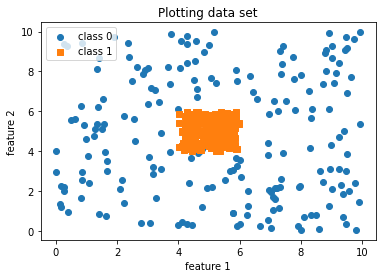

In [ ]:
plt.scatter(X[y==0, 0], X[y==0, 1], label='class 0', marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class 1', marker='s')
plt.title('Plotting data set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

## Since the dataset is not-linear, ie the dataset can't be divided by a line the accurracy of a perceptron trained on this problem will be very low.

## In my opinion, inorder to get a good accuracy on this dataset we will have to introduce non-linearity to the neural net by using multiple layers and multiple activation functions

# 3b) Training the model on first 150 classes of class 0 and first 150 classes of class 1

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
X.shape

(400, 2)

In [ ]:
X_train_1, X_test_1 = X[0:150] , X[150:200]
y_train_1, y_test_1 = y[0:150], y[150:200]

In [ ]:
X_train_2, X_test_2 = X[200:350] , X[350:]
y_train_2, y_test_2 = y[200:350], y[350:]

In [ ]:
print(X_train_1.shape)
print(X_test_1.shape)
print(X_train_2.shape)
print(X_train_2.shape)

(150, 2)
(50, 2)
(150, 2)
(150, 2)


In [ ]:
X_train = np.concatenate((X_train_1, X_train_2), axis=0)
X_test = np.concatenate((X_test_1, X_test_2), axis=0)
y_train = np.concatenate((y_train_1, y_train_2), axis=0)
y_test = np.concatenate((y_test_1, y_test_2), axis=0)

In [ ]:
ppn = Perceptron(num_features=2)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

ppn.train(X_train_tensor, y_train_tensor, epochs=10)

print('Model parameters:')
print('  Weights: %s' % ppn.weights)
print('  Bias: %s' % ppn.bias)

3
2
4
2
2
3
2
2
4
4
Model parameters:
  Weights: tensor([[-9.5989],
        [-0.9693]])
  Bias: tensor([0.])


In [ ]:
ppn = Perceptron(num_features=2)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

ppn.train(X_train_tensor, y_train_tensor, epochs=10)

print('Model parameters:')
print('  Weights: %s' % ppn.weights)
print('  Bias: %s' % ppn.bias)

3
2
4
2
2
3
2
2
4
4
Model parameters:
  Weights: tensor([[-9.5989],
        [-0.9693]])
  Bias: tensor([0.])


In [ ]:
train_acc = ppn.evaluate(X_train_tensor, y_train_tensor)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 50.00%


In [ ]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

test_acc = ppn.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 50.00%


#3c - I dont expect a model to perform well on test data when it doesn't do well in training data, that is because if the distributions of both training and testing data is same and if the model wasn't able to learn properly from training data there can't be a way for it to perform well on test data.